In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#Preview the data
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

In [8]:
#View .head()

species_info.head()


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status


In [7]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

#### Data Characteristics

Next, we check for the dimensions of the data sets, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [11]:
print(f"species shape: {species_info.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


In [4]:
# What are the unique categories available?
print(species_info['category'].unique())

# Store the categories in a variable
species_categories = ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant']

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


We can drill down deeper and see the count of category in the data. Vascular plants are by far the largest share of species with 4,470 in the data with reptiles being the fewest with 79.

In [13]:
species_info.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another column to explore is `conservation_status`. The column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` values. 

In [15]:
print(f"number of conservation statuses:{species_info.conservation_status.nunique()}")
print(f"unique conservation statuses:{species_info.conservation_status.unique()}")

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [24]:
# What are the unique park names?
print(observations['park_name'].unique())

#Store park names into a variable 'park_names'
park_names = ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [23]:
# Merge the two DataFrames
species_observations = pd.merge(species_info, observations, left_on='scientific_name', right_on='scientific_name')
print(species_observations.head())

# Let's explore the duplicates
species_observations.duplicated(subset=['scientific_name'])

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0     No Intervention                  Bryce National Park           130  
1     No Intervention            Yellowstone National Park           270  
2     No Intervention  Great Smoky Mountains National Park            98  
3     No Intervention               Yosemite National Park           117  
4     No Intervention               Yosemite National Park           128  


0        False
1         True
2         True
3         True
4        False
         ...  
25627     True
25628    False
25629     True
25630     True
25631     True
Length: 25632, dtype: bool

In [24]:
# Let's see the unique conservation statuses
print(species_observations['conservation_status'].unique())
# How many NaN values are there in consercation status?
print(species_observations['conservation_status'].isnull())
print(species_observations['category'].count())
print(len(species_observations['scientific_name']))

['No Intervention' 'Species of Concern' 'Endangered' 'In Recovery'
 'Threatened']
0        False
1        False
2        False
3        False
4        False
         ...  
25627    False
25628    False
25629    False
25630    False
25631    False
Name: conservation_status, Length: 25632, dtype: bool
25632
25632


This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [17]:
species_info.fillna('No Intervention', inplace=True)
species_info.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. There is both the table and chart to explore below.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals. 


In [18]:
conservationCategory = species_info[species_info.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


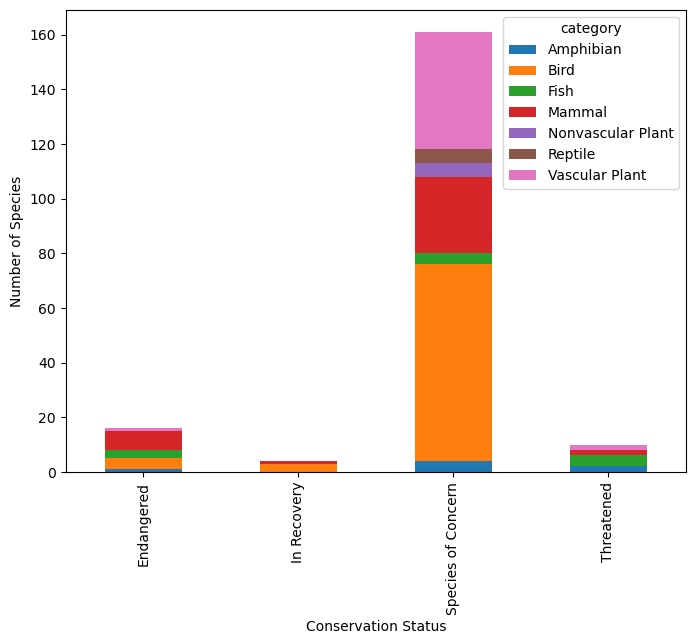

In [19]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

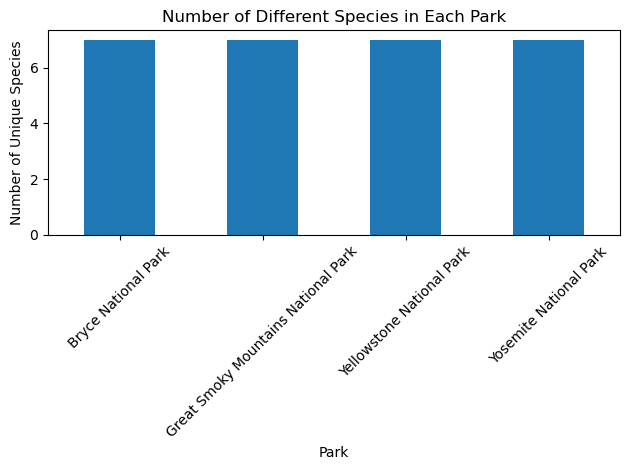

In [25]:
# Let's get the number of species per category in each park



# Group by park and count unique species
species_count = species_observations.groupby('park_name')['category'].nunique()

# Create a bar plot
species_count.plot(kind='bar')
plt.xlabel('Park')
plt.ylabel('Number of Unique Species')
plt.title('Number of Different Species in Each Park')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


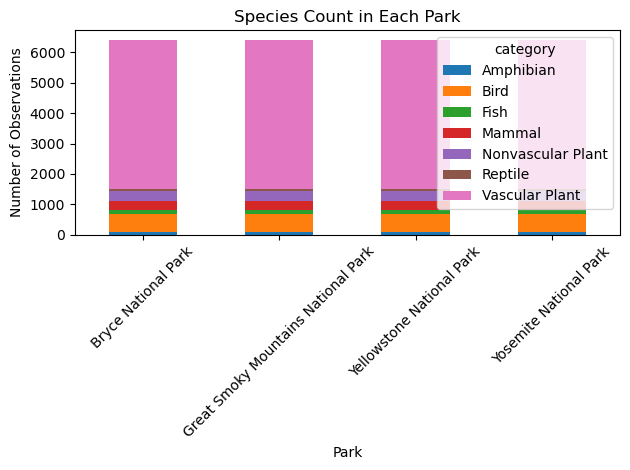

In [55]:
# Count the occurrences of each species in each park
species_counts = species_observations.groupby(['park_name', 'category']).size().unstack(fill_value=0)

# Create a stacked bar plot
species_counts.plot(kind='bar', stacked=True)
plt.xlabel('Park')
plt.ylabel('Number of Observations')
plt.title('Species Count in Each Park')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

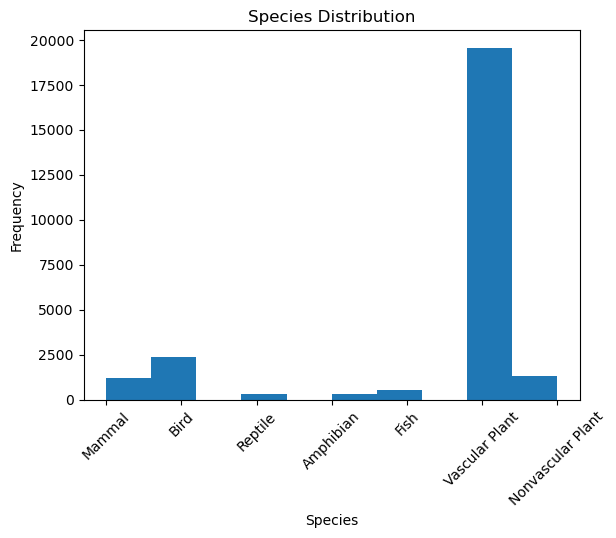

<function matplotlib.pyplot.clf()>

In [71]:
#Distribution of conservation status

plt.hist(species_observations['category'], bins=10)

plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Species Distribution')
plt.xticks(rotation=45)

plt.show()
plt.clf

In [78]:
species_observations.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
park_name              object
observations            int64
dtype: object